# CUB-200 Bird Image Classification Project

## Introduction

In this notebook, we will be using the dataset that is been provided by California Institute of Technology containing 200 bird species. The data that is been provided is in image format, a total of 11,788.

We will be building a model that can predict unseen birds images or photos and categorize them into it's respective classes folder.

Before, we start our project. Let's upgrade our tensorflow to the latest version of 2.10.

In [5]:
# Uncomment to upgrade tensorflow to the latest version 2.10
#!pip install -q --upgrade tensorflow
!pip install -U tensorflow==2.10.0

## 1. Become One With Dataset.

In [6]:
# Importing all the necessary packages needed
import os
import pathlib
import tarfile
import random
import datetime
import shutil
!pip install -q split-folders[full]
import splitfolders
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomHeight, RandomWidth
from tensorflow.keras.layers import InputLayer, Input, GlobalAveragePooling2D

In [7]:
tf.__version__

'2.6.4'

The dataset is already avaliable in the kaggle website, you can check it by clicking the [link](https://www.kaggle.com/datasets/veeralakrishna/200-bird-species-with-11788-images)

First, we would need to extract the file to check the contects.

In [8]:
# Opening and Extracting the tgz file
file1 = tarfile.open("../input/200-bird-species-with-11788-images/CUB_200_2011.tgz")
file1.extractall("./data/")
file1.close()

In [9]:
#image directory
img_dir = "./data/CUB_200_2011/images/"

In [10]:
# Reading the data folder.
total_images = []
for dirpath, dirnames, filenames in os.walk(img_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")
    total_images.append(len(filenames))
print(f"Total images in Dataset are: {sum(total_images)}.")

There are 200 directories and 0 files in ./data/CUB_200_2011/images/
There are 0 directories and 60 files in ./data/CUB_200_2011/images/082.Ringed_Kingfisher
There are 0 directories and 60 files in ./data/CUB_200_2011/images/063.Ivory_Gull
There are 0 directories and 58 files in ./data/CUB_200_2011/images/141.Artic_Tern
There are 0 directories and 60 files in ./data/CUB_200_2011/images/076.Dark_eyed_Junco
There are 0 directories and 60 files in ./data/CUB_200_2011/images/048.European_Goldfinch
There are 0 directories and 60 files in ./data/CUB_200_2011/images/198.Rock_Wren
There are 0 directories and 60 files in ./data/CUB_200_2011/images/041.Scissor_tailed_Flycatcher
There are 0 directories and 59 files in ./data/CUB_200_2011/images/023.Brandt_Cormorant
There are 0 directories and 60 files in ./data/CUB_200_2011/images/144.Common_Tern
There are 0 directories and 59 files in ./data/CUB_200_2011/images/039.Least_Flycatcher
There are 0 directories and 59 files in ./data/CUB_200_2011/imag

In [11]:
# Getting the 200 class names
data_dir = pathlib.Path(img_dir)
label_names_200 = np.array(sorted([item.name for item in data_dir.glob("*")]))
label_names_200

array(['001.Black_footed_Albatross', '002.Laysan_Albatross',
       '003.Sooty_Albatross', '004.Groove_billed_Ani',
       '005.Crested_Auklet', '006.Least_Auklet', '007.Parakeet_Auklet',
       '008.Rhinoceros_Auklet', '009.Brewer_Blackbird',
       '010.Red_winged_Blackbird', '011.Rusty_Blackbird',
       '012.Yellow_headed_Blackbird', '013.Bobolink',
       '014.Indigo_Bunting', '015.Lazuli_Bunting', '016.Painted_Bunting',
       '017.Cardinal', '018.Spotted_Catbird', '019.Gray_Catbird',
       '020.Yellow_breasted_Chat', '021.Eastern_Towhee',
       '022.Chuck_will_Widow', '023.Brandt_Cormorant',
       '024.Red_faced_Cormorant', '025.Pelagic_Cormorant',
       '026.Bronzed_Cowbird', '027.Shiny_Cowbird', '028.Brown_Creeper',
       '029.American_Crow', '030.Fish_Crow', '031.Black_billed_Cuckoo',
       '032.Mangrove_Cuckoo', '033.Yellow_billed_Cuckoo',
       '034.Gray_crowned_Rosy_Finch', '035.Purple_Finch',
       '036.Northern_Flicker', '037.Acadian_Flycatcher',
       '038.Grea

In [12]:
# Split the dataset into train and test
splitfolders.ratio(input=img_dir, output="./data/200_classes_data/", seed=42, ratio=(0.8, 0.2))

Copying files: 11788 files [00:04, 2585.26 files/s]


With this we have all the 200 species splited in training and testing dataset.

Now, lets create another folder of 10 birds species. This will be our baseline dataset. We will be using the first 10 birds and work our way till 200 birds.

In [13]:
# Creating 10 birds dataset.
for i in range(0,10):
    shutil.copytree(f"./data/200_classes_data/train/{label_names_200[i]}", f"./data/10_classes_data/train/{label_names_200[i]}")
    shutil.copytree(f"./data/200_classes_data/val/{label_names_200[i]}", f"./data/10_classes_data/val/{label_names_200[i]}")

In [14]:
# Naming the directories
classes_10_train_dir = "./data/10_classes_data/train/"
classes_10_test_dir = "./data/10_classes_data/val/"
classes_200_train_dir = "./data/200_classes_data/train/"
classes_200_test_dir = "./data/200_classes_data/val/"

In [15]:
# Reading the 10 classes data folder.
total_images = []
all_dirnames = []
for i in (classes_10_train_dir, classes_10_test_dir):
    for dirpath, dirnames, filenames in os.walk(i):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")
        total_images.append(len(filenames))
        all_dirnames.append(dirnames)
print(f"Total images in Dataset are: {sum(total_images)}, which are split in Training set: {sum(total_images[1:11])} and Testing set: {sum(total_images[12:])}.")

There are 10 directories and 0 images in ./data/10_classes_data/train/
There are 0 directories and 32 images in ./data/10_classes_data/train/006.Least_Auklet
There are 0 directories and 38 images in ./data/10_classes_data/train/008.Rhinoceros_Auklet
There are 0 directories and 42 images in ./data/10_classes_data/train/007.Parakeet_Auklet
There are 0 directories and 48 images in ./data/10_classes_data/train/001.Black_footed_Albatross
There are 0 directories and 48 images in ./data/10_classes_data/train/002.Laysan_Albatross
There are 0 directories and 48 images in ./data/10_classes_data/train/010.Red_winged_Blackbird
There are 0 directories and 48 images in ./data/10_classes_data/train/004.Groove_billed_Ani
There are 0 directories and 47 images in ./data/10_classes_data/train/009.Brewer_Blackbird
There are 0 directories and 35 images in ./data/10_classes_data/train/005.Crested_Auklet
There are 0 directories and 46 images in ./data/10_classes_data/train/003.Sooty_Albatross
There are 10 di

In [16]:
# Creating 10 class names
data_dir = pathlib.Path(classes_10_train_dir)
label_names_10 = np.array(sorted([item.name for item in data_dir.glob("*")]))
label_names_10

array(['001.Black_footed_Albatross', '002.Laysan_Albatross',
       '003.Sooty_Albatross', '004.Groove_billed_Ani',
       '005.Crested_Auklet', '006.Least_Auklet', '007.Parakeet_Auklet',
       '008.Rhinoceros_Auklet', '009.Brewer_Blackbird',
       '010.Red_winged_Blackbird'], dtype='<U26')

Now, we have both the images and labels in proper order.

Text(0.5, 0.98, 'Dataset Proportion for Training and Testing')

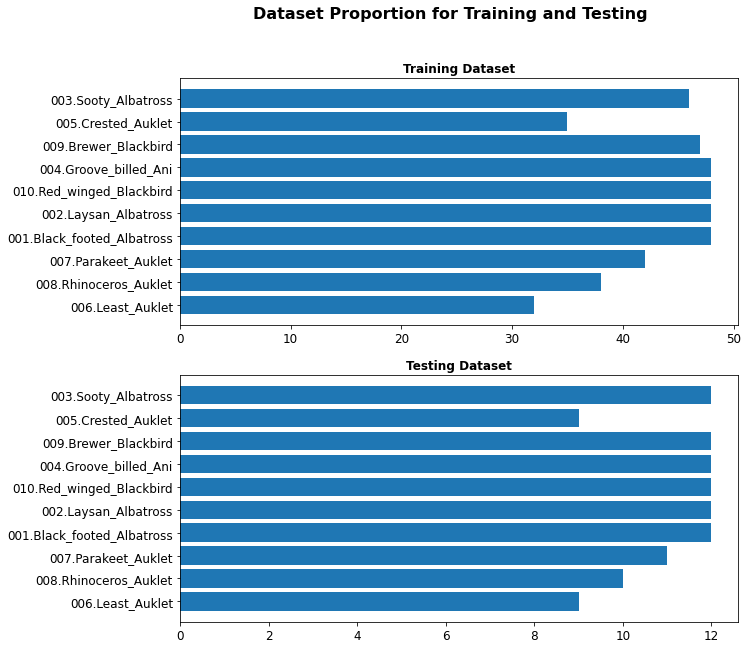

In [17]:
# Visualizing the train and test data proportion.
plt.figure(figsize=(10, 10))

# Training dataset
plt.subplot(2,1,1)
plt.barh(all_dirnames[0], total_images[1:11])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Training Dataset', size=12, weight='bold')

# Testing dataset
plt.subplot(2,1,2)
plt.barh(all_dirnames[0], total_images[12:])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Testing Dataset', size=12, weight='bold')

plt.suptitle('Dataset Proportion for Training and Testing', size=16, weight='bold')

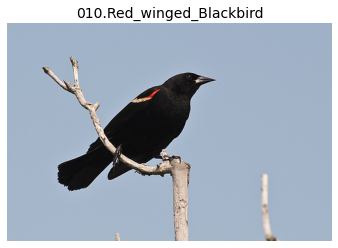

In [18]:
# View random images from training set.
# Creating a function to view random images 
def view_random_images(target_dir, target_class):
    """
    View any random images from any directory

    Args: target_dir - Train or Test Directory.
          target_class - Class Labels.
    """
    target_folder = target_dir + target_class
    random_img = random.sample(os.listdir(target_folder),1)
    img = mpimg.imread(target_folder + "/" + random_img[0])
    plt.imshow(img)
    plt.title(target_class, size=14)
    plt.axis(False)

view_random_images(classes_10_train_dir, random.choice(label_names_10))

Now lets view all the classes.

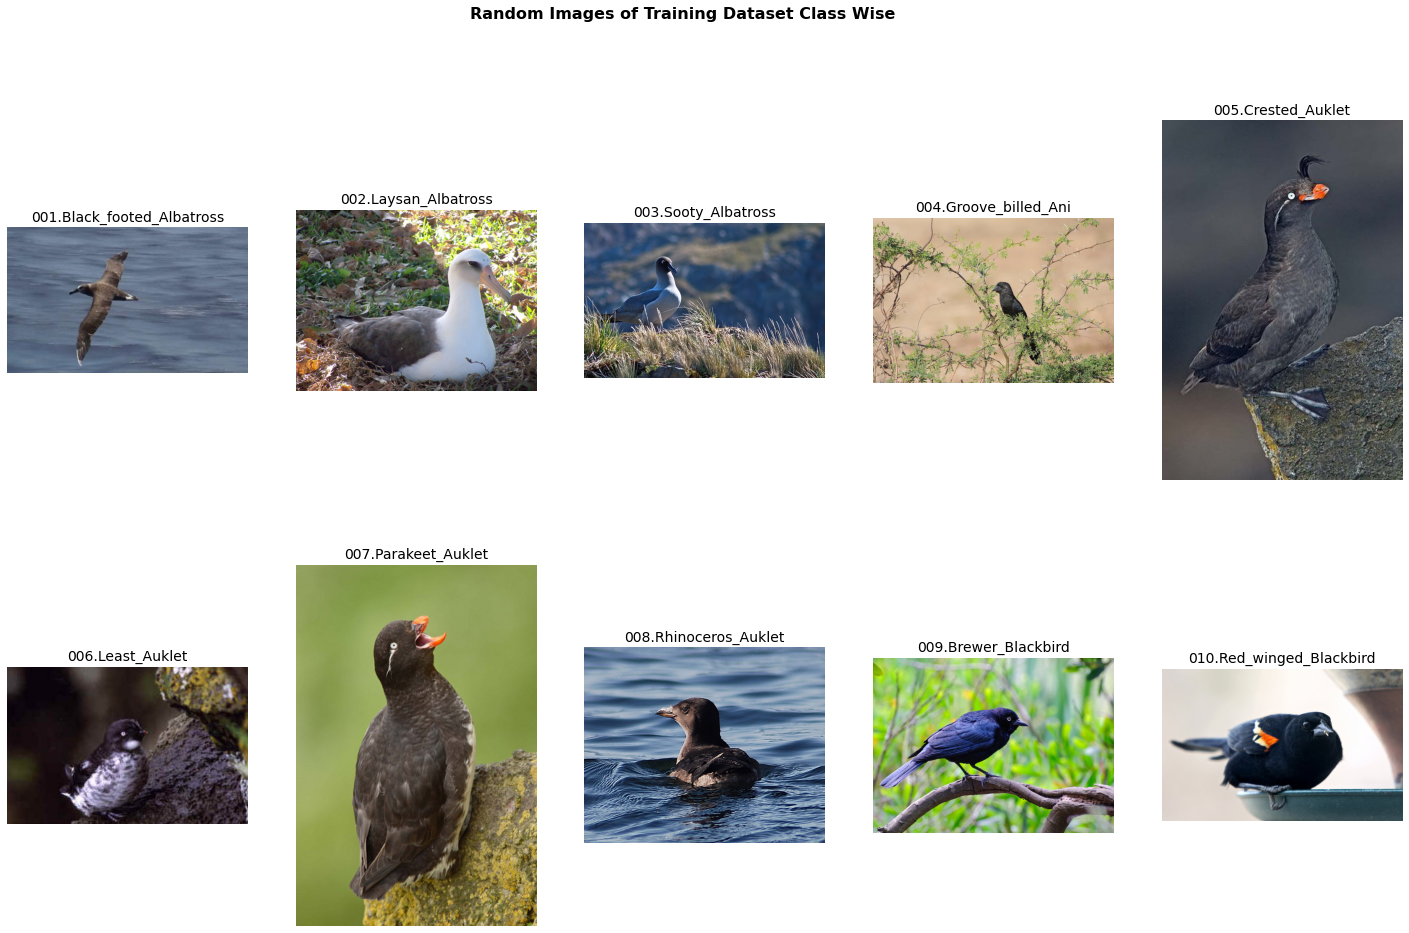

In [19]:
# Visualizing all the classes.
plt.figure(figsize=(25,15))
for i in range(10):
  plt.subplot(2,5,i + 1)
  view_random_images(classes_10_train_dir, label_names_10[i])
  plt.suptitle('Random Images of Training Dataset Class Wise', size=16, weight='bold')

## 2. Preprocess the data

Now, that we have storted everything and have understood the data, we will now preprocess the data in a way that the model will understand.

We will use the function called "tf.keras.utils.image_dataset_from_directory", this will create a dataset in batches and appropriate tensor for all the images and labels.

In [20]:
# Create data inputs 
train_data_10 = image_dataset_from_directory(classes_10_train_dir,
                                          image_size=(224,224),
                                          label_mode='categorical',
                                          batch_size=32)
test_data_10 = image_dataset_from_directory(classes_10_test_dir,
                                          image_size=(224,224),
                                          label_mode='categorical',
                                          batch_size=32)

Found 432 files belonging to 10 classes.
Found 111 files belonging to 10 classes.


The number of images that the dataloader has found and processed is correct.

Lets check what the function above has done to our dataset.

In [21]:
print(f"Training data: {train_data_10}\nTesting data: {test_data_10}")

Training data: <BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>
Testing data: <BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>


There are two tensors in each of our train and test dataset.

Looking it closely, the first tensor has shape of (Batch_Size, Height, Width, Color Channels) and the second tensor has the shape of (Batch_Size, Labels)

Lets check it out!

In [22]:
train_data_10.class_names

['001.Black_footed_Albatross',
 '002.Laysan_Albatross',
 '003.Sooty_Albatross',
 '004.Groove_billed_Ani',
 '005.Crested_Auklet',
 '006.Least_Auklet',
 '007.Parakeet_Auklet',
 '008.Rhinoceros_Auklet',
 '009.Brewer_Blackbird',
 '010.Red_winged_Blackbird']

All the labels are in the class names method.

In [23]:
for images, labels in train_data_10.take(1):
    print(images, labels)

tf.Tensor(
[[[[133.29463  137.29463  147.3482  ]
   [129.15991  133.15991  142.15991 ]
   [119.6584   123.6584   133.39055 ]
   ...
   [106.58039  111.58039  117.58039 ]
   [106.71231  111.71231  117.71231 ]
   [102.50621  107.50621  113.50621 ]]

  [[130.53531  134.53531  144.58888 ]
   [126.64525  130.64525  139.64525 ]
   [117.86009  121.86009  131.59224 ]
   ...
   [105.71236  110.71236  116.71236 ]
   [102.20001  107.20001  111.20001 ]
   [102.651024 107.651024 111.651024]]

  [[125.739075 129.73907  139.79265 ]
   [122.96628  126.96628  135.96628 ]
   [116.95799  120.95799  130.69012 ]
   ...
   [106.       111.       117.      ]
   [106.590324 111.590324 117.590324]
   [104.15641  109.15641  115.15641 ]]

  ...

  [[ 80.55564   83.33473   84.72759 ]
   [105.148315 104.30902  109.22867 ]
   [142.09286  143.85442  148.16167 ]
   ...
   [ 28.656796  29.490849  28.400478]
   [ 87.99021   87.99021   89.99021 ]
   [ 49.36268   49.36268   49.523384]]

  [[ 96.543976  95.69577  100.2403

What we see right now is the first batch of our training datset containing the format that I mentioned above, with 32 images data and labels of the same in one hot encoded format.

In [24]:
# Total no. batches created for our datasets.
len(train_data_10), len(test_data_10)

(14, 4)

Lets now visualize the training dataset after preprocessing.

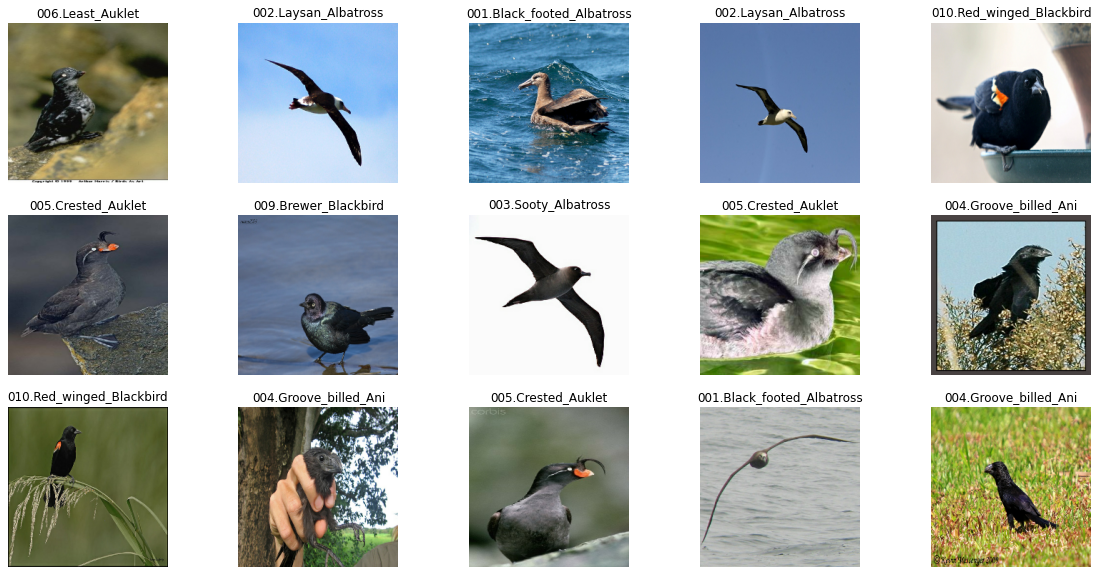

In [25]:
plt.figure(figsize=(20,10))
for images, labels in train_data_10.take(1):
  for i in range(15):
    ax = plt.subplot(3, 5, i + 1),
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(label_names_10[labels[i].numpy().argmax()])
    plt.axis(False)

## 3. Building a Baseline Model - model_0

All the data of images and labels are in tensor format which can go through the model and layers perfectly.

We will be creating a small and simple model to understand the data performance.

In [26]:
# Creating a model with 3 layer VGG style architecture
model_0 = Sequential([
    Rescaling(1./255),
    Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(128, 3, activation='relu'),
    Conv2D(128, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiling the model_0
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

## 4. Fitting the Model

Now, that we have created the model and compiled it to suit our dataset.

It's time to fit the model

In [27]:
# Before we fit the model, we will create a function for our tensorboard callback.
def tensorboard_callbacks(dir_name, exp_name):
    """
    Creates a TensorBoard callback instance to store log files.
    
    Stores log files with the filepath:
      "dir_name/experiment_name/current_datetime/"
    
    Args:
      dir_name: target directory to store TensorBoard log files
      experiment_name: name of experiment directory (e.g. efficientnet_model_1)
    """
    log_dir = dir_name + '/' + exp_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H:%M:%S')
    tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving the log of Tensorboard Callabck in directory: {log_dir}")
    return tb_callback

In [28]:
# Fitting the model
history_0 = model_0.fit(train_data_10,
                        epochs=5,
                        steps_per_epoch=len(train_data_10),
                        validation_data=test_data_10,
                        validation_steps=len(test_data_10),
                        callbacks=[tensorboard_callbacks('tensorboard_callbacks', 'baseline_model_0')])

Saving the log of Tensorboard Callabck in directory: tensorboard_callbacks/baseline_model_0/20220924-15:08:03
Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
14/14 [==============================] - ETA: 0s - loss: 2.4515 - accuracy: 0.0903WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f6468b1c830> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.e

In [29]:
# model_0 summary
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0

This is great. The baseline model is working awesome.

## 5. Evaluate our Model

Lets evaluate and visualize our models loss and accuracy curves.

In [30]:
# Evaluating our model on test data
model_0.evaluate(test_data_10)

4/4 [==============================] - 0s 19ms/step - loss: 2.2758 - accuracy: 0.2883


[2.2757511138916016, 0.28828829526901245]

In [31]:
# Creating a function to for plotting our loss and accuracy curves
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    
    Args:
      history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
    """
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']
    epochs=range(len(loss))
  
    plt.figure(figsize=(15, 5))
    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title("Loss", weight="bold")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title("Accuracy", weight="bold")
    plt.xlabel("Epochs")
    plt.legend()

    plt.suptitle("Loss and Accuracy Curves of the Model", size=14, weight='bold')

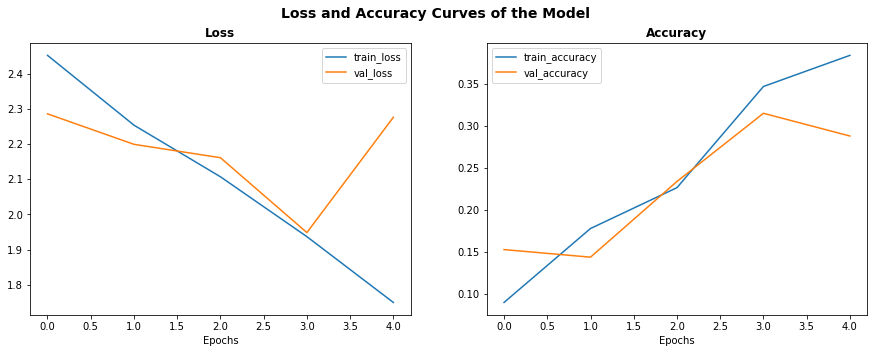

In [32]:
# Plotting Loss and Accuracy curves
plot_loss_curves(history_0)

## 6. Adjust Model Parameters

In [33]:
# Making the model simple
model_1 = Sequential([
    Rescaling(1./255),
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compiling the model_0
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data_10,
                        epochs=5,
                        steps_per_epoch = len(train_data_10),
                        validation_data=test_data_10,
                        validation_steps=len(test_data_10),
                        callbacks=[tensorboard_callbacks('tensorboard_callbacks', 'dataaug_model_1')])

Saving the log of Tensorboard Callabck in directory: tensorboard_callbacks/dataaug_model_1/20220924-15:08:33
Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
14/14 [==============================] - ETA: 0s - loss: 2.4180 - accuracy: 0.1181WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f646261f950> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.ex

In [34]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 10)       

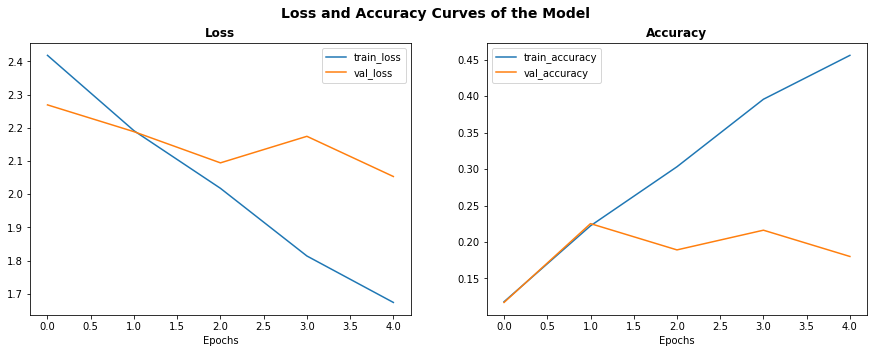

In [35]:
# Plotting Loss and Accuracy curves
plot_loss_curves(history_1)

Looking at the graph, we can see that gap between the training and validation has a slightly wide gap between each other.

This is a clear indication of our model is overfitting the training set. Its getting good result on the training set while the test set is performing poorly.

Looking at our model_0 and model_1, we can conclude that on simple and complex model overfitting is present but looking at the accuracy our model is atleast not guessing(>0.10) and is understanding something out of the training dataset.

## 7. Feature Extraction - Transfer Learning Model

Lets imporve our result using transfer learning.

We will be using the ```tf.keras.application``` to load the pretrained architectures with their pretrained weights on ImageNet or similar huge computer vision datasets.

### 1. EfficientNetB0

First we will use a EfficientNetB0 architecture which has shown good results and is the simplest in the EfficientNet Module, EfficientNet ranges from B0 to B7, where the complexity and the training paramters increase with every range.

![](https://1.bp.blogspot.com/-DjZT_TLYZok/XO3BYqpxCJI/AAAAAAAAEKM/BvV53klXaTUuQHCkOXZZGywRMdU9v9T_wCLcBGAs/s1600/image2.png)

*The architecture for our network EfficientNet-B0 is simple and clean, making it easier to scale and generalize.*

In [36]:
# In this model, we will be using functional model.
base_efficientnetb0_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_efficientnetb0_model.trainable = False
inputs = Input(shape=(224, 224, 3), name='input_layer')
x = base_efficientnetb0_model(inputs)
x = GlobalAveragePooling2D(name='global_average_pool2d')(x)
outputs = Dense(10, activation='softmax', name='output_layer')(x)
model_2 = Model(inputs, outputs)

# Compiling the model
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_efficientnetb0 = model_2.fit(train_data_10,
                                    epochs=5,
                                    steps_per_epoch=len(train_data_10),
                                    validation_data=test_data_10,
                                    validation_steps=len(test_data_10),
                                    callbacks=[tensorboard_callbacks('tensorboard_callbacks', 'efficientnetb0_model_2')])

16719872/16705208 [==============================] - 0s 0us/step
Saving the log of Tensorboard Callabck in directory: tensorboard_callbacks/efficientnetb0_model_2/20220924-15:08:45
Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  


14/14 [==============================] - ETA: 0s - loss: 2.0070 - accuracy: 0.3588WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f63d3caddd0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
14/14 [==============================] - 9s 324ms/step - loss: 2.0070 - accuracy: 0.3588 - val_loss: 1.5070 - val_accuracy: 0.6126
Epoch 2/5
14/14 [==============================] - 2s 103ms/step - loss: 1.2114 - accuracy: 0.7639 - val_loss: 1.0246 - val_accuracy: 0.7658
Epoch 3/5
14/14 [==============================] - 2s 80ms/step - loss: 0.8200 - accuracy: 0.8565 - val_loss: 0.7771 - val_accuracy: 0.8288
Epoch 4/5
14/14 [=======